In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, time, datetime, timedelta
from dateutil import parser

In [62]:
weather = pd.read_csv("/Users/florianlichius/Daten/Boston")
#transform timestamp to datetime and filter for 2017 and 2018
weather['timestamp'] = pd.to_datetime(weather['timestamp'])
weather = weather[(weather['timestamp'].dt.year >= 2017) & (weather['timestamp'].dt.year <= 2018)]
weather.reset_index(drop=True, inplace=True)


In [63]:
weather.head(10)

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Boston,2017-01-01 00:54:00,4.0,26,Cloudy,1013.50,13.0,0.00,1.0
1,Boston,2017-01-01 01:54:00,5.0,11,Light Rain,1012.49,20.0,0.00,1.0
2,Boston,2017-01-01 02:54:00,5.0,11,Light Rain,1011.81,24.0,0.51,1.0
3,Boston,2017-01-01 03:33:00,5.0,11,Light Rain / Windy,1011.47,39.0,0.51,-1.0
4,Boston,2017-01-01 03:54:00,4.0,11,Light Rain,1011.47,30.0,0.51,-1.0
5,Boston,2017-01-01 04:54:00,4.0,11,Light Rain,1010.79,24.0,0.76,-1.0
6,Boston,2017-01-01 05:54:00,4.0,11,Light Rain,1010.79,22.0,0.25,-1.0
7,Boston,2017-01-01 06:54:00,3.0,11,Light Rain,1011.13,28.0,0.76,-2.0
8,Boston,2017-01-01 07:54:00,3.0,11,Light Rain,1011.13,22.0,0.51,-2.0
9,Boston,2017-01-01 08:47:00,3.0,26,Cloudy,1010.79,26.0,0.25,-3.0


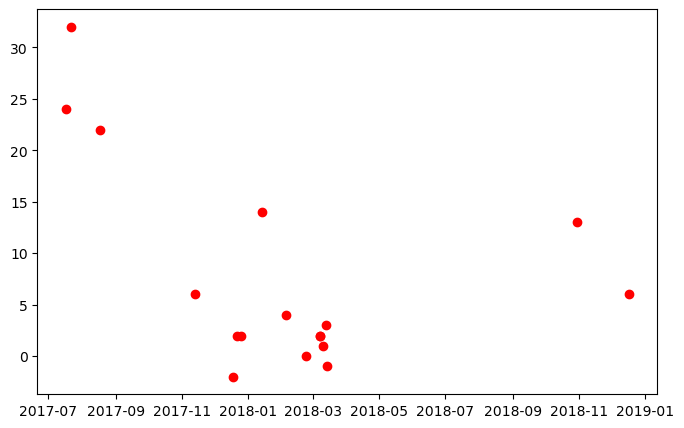

In [64]:
null_values = weather[weather.isnull().any(axis=1)].copy()
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(null_values['timestamp'], null_values['temperature'],color='red')

In [65]:
#count the proportion of null values
weather.isnull().sum().sum()/len(weather)

0.0014691943127962085

In [66]:
#drop all rows with null values
weather = weather.dropna(axis=0, how='any')

In [33]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21099
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     21082 non-null  object        
 1   timestamp                21082 non-null  datetime64[ns]
 2   temperature              21082 non-null  float64       
 3   cloud_cover              21082 non-null  int64         
 4   cloud_cover_description  21082 non-null  object        
 5   pressure                 21082 non-null  float64       
 6   windspeed                21082 non-null  float64       
 7   precipitation            21082 non-null  float64       
 8   felt_temperature         21082 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [34]:
weather.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,11.33716,25.924296,1015.132558,18.483493,0.206076,9.337160
std,9.85339,7.607045,8.970921,9.477210,1.023969,12.310919
min,-19.00000,4.000000,976.280000,0.000000,0.000000,-33.000000
25%,3.00000,26.000000,1010.120000,11.000000,0.000000,-1.000000
50%,11.00000,27.000000,1015.190000,17.000000,0.000000,11.000000
75%,19.00000,33.000000,1020.950000,24.000000,0.000000,19.000000
max,36.00000,47.000000,1043.960000,78.000000,27.940000,41.000000


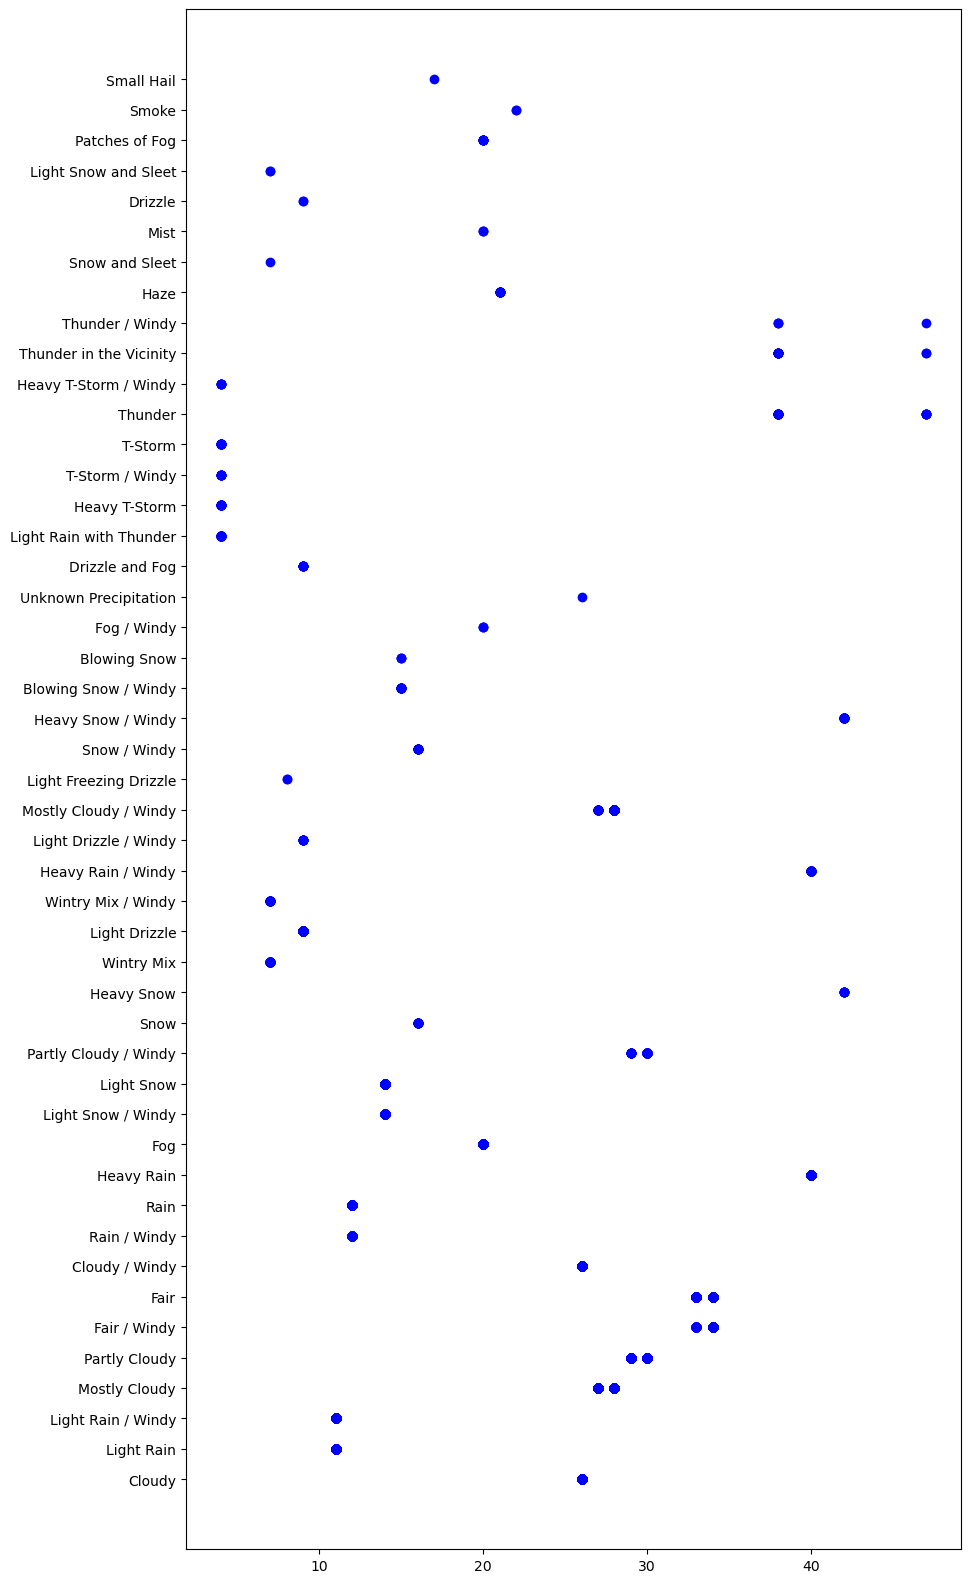

In [31]:
#plot cloudcover against cloud_cover_description use a different color
fig, ax = plt.subplots(figsize=(10,20))
ax.scatter(weather['cloud_cover'],weather['cloud_cover_description'],color='blue')

In [35]:
mostCloudy = weather[weather['cloud_cover_description'] == 'Mostly Cloudy'].copy()
#print(mostCloudy.describe())
print(mostCloudy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3305 entries, 14 to 21087
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     3305 non-null   object        
 1   timestamp                3305 non-null   datetime64[ns]
 2   temperature              3305 non-null   float64       
 3   cloud_cover              3305 non-null   int64         
 4   cloud_cover_description  3305 non-null   object        
 5   pressure                 3305 non-null   float64       
 6   windspeed                3305 non-null   float64       
 7   precipitation            3305 non-null   float64       
 8   felt_temperature         3305 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 258.2+ KB
None


In [36]:
partlyCloudy = weather[weather['cloud_cover_description'] == 'Partly Cloudy'].copy()
partlyCloudy.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000
mean,14.510708,29.627128,1016.189863,17.833059,0.002230,13.100494
std,10.463990,0.483701,7.848293,6.774923,0.083829,12.748639
min,-14.000000,29.000000,989.480000,0.000000,0.000000,-22.000000
25%,6.000000,29.000000,1011.470000,13.000000,0.000000,2.000000
50%,17.000000,30.000000,1015.870000,19.000000,0.000000,17.000000
75%,23.000000,30.000000,1020.610000,22.000000,0.000000,23.000000
max,36.000000,30.000000,1043.280000,31.000000,3.560000,39.000000


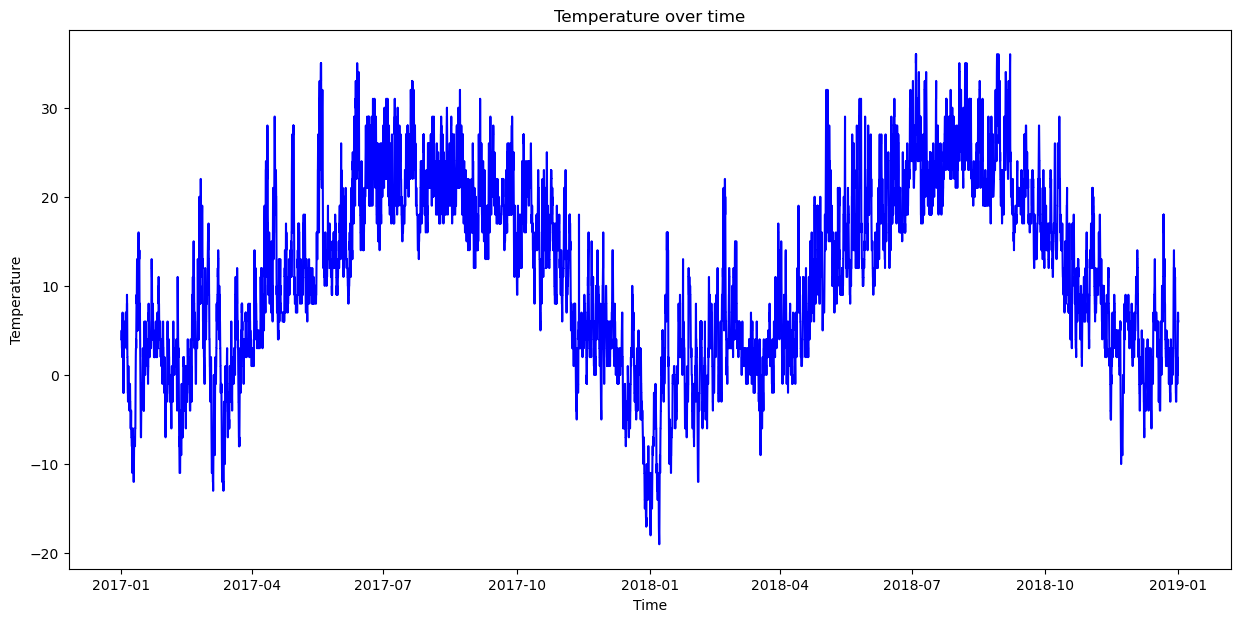

In [38]:
#plot weather data tempature as y and x as time
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(weather['timestamp'], weather['temperature'], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature over time')
plt.show()

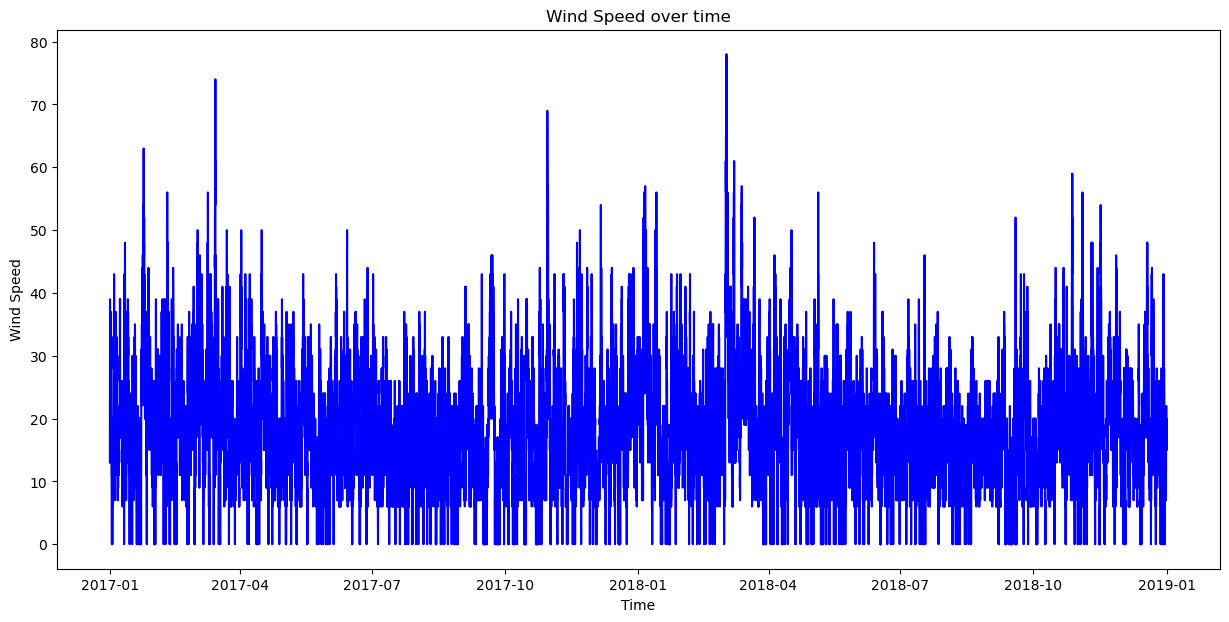

In [40]:
#plot windspeed over time
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(weather['timestamp'], weather['windspeed'], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Wind Speed')
ax.set_title('Wind Speed over time')
plt.show()

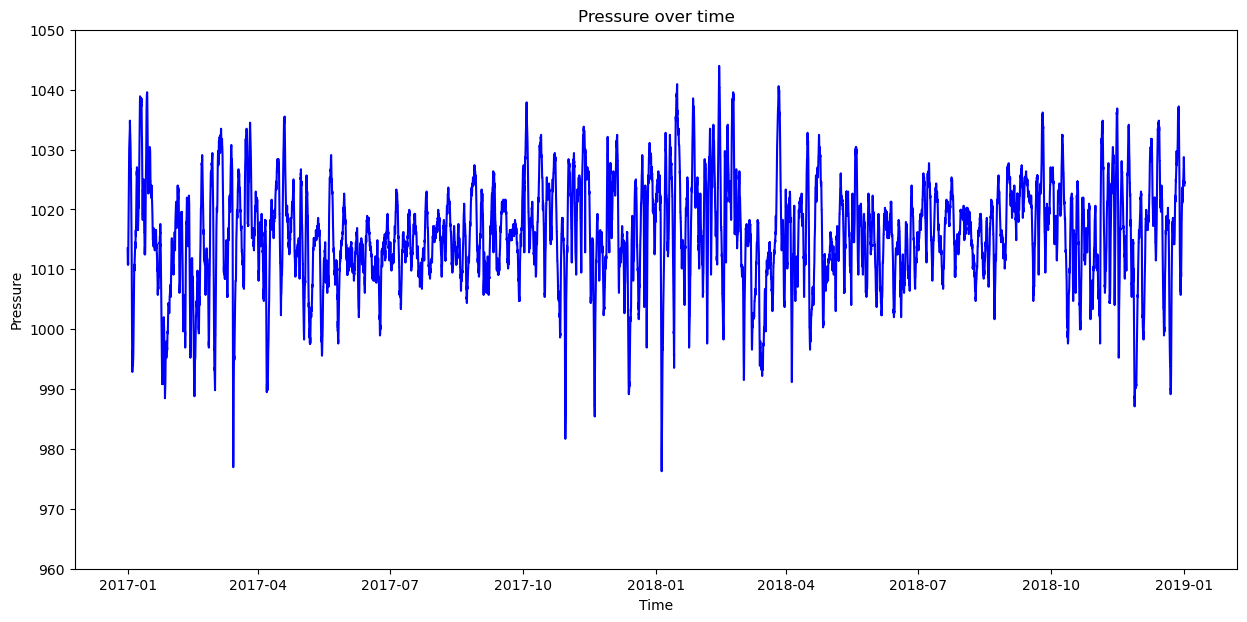

In [41]:
#plot pressure over time 
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(weather['timestamp'], weather['pressure'], color='blue')
ax.set_ylim(960,1050)
ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
ax.set_title('Pressure over time')
plt.show()

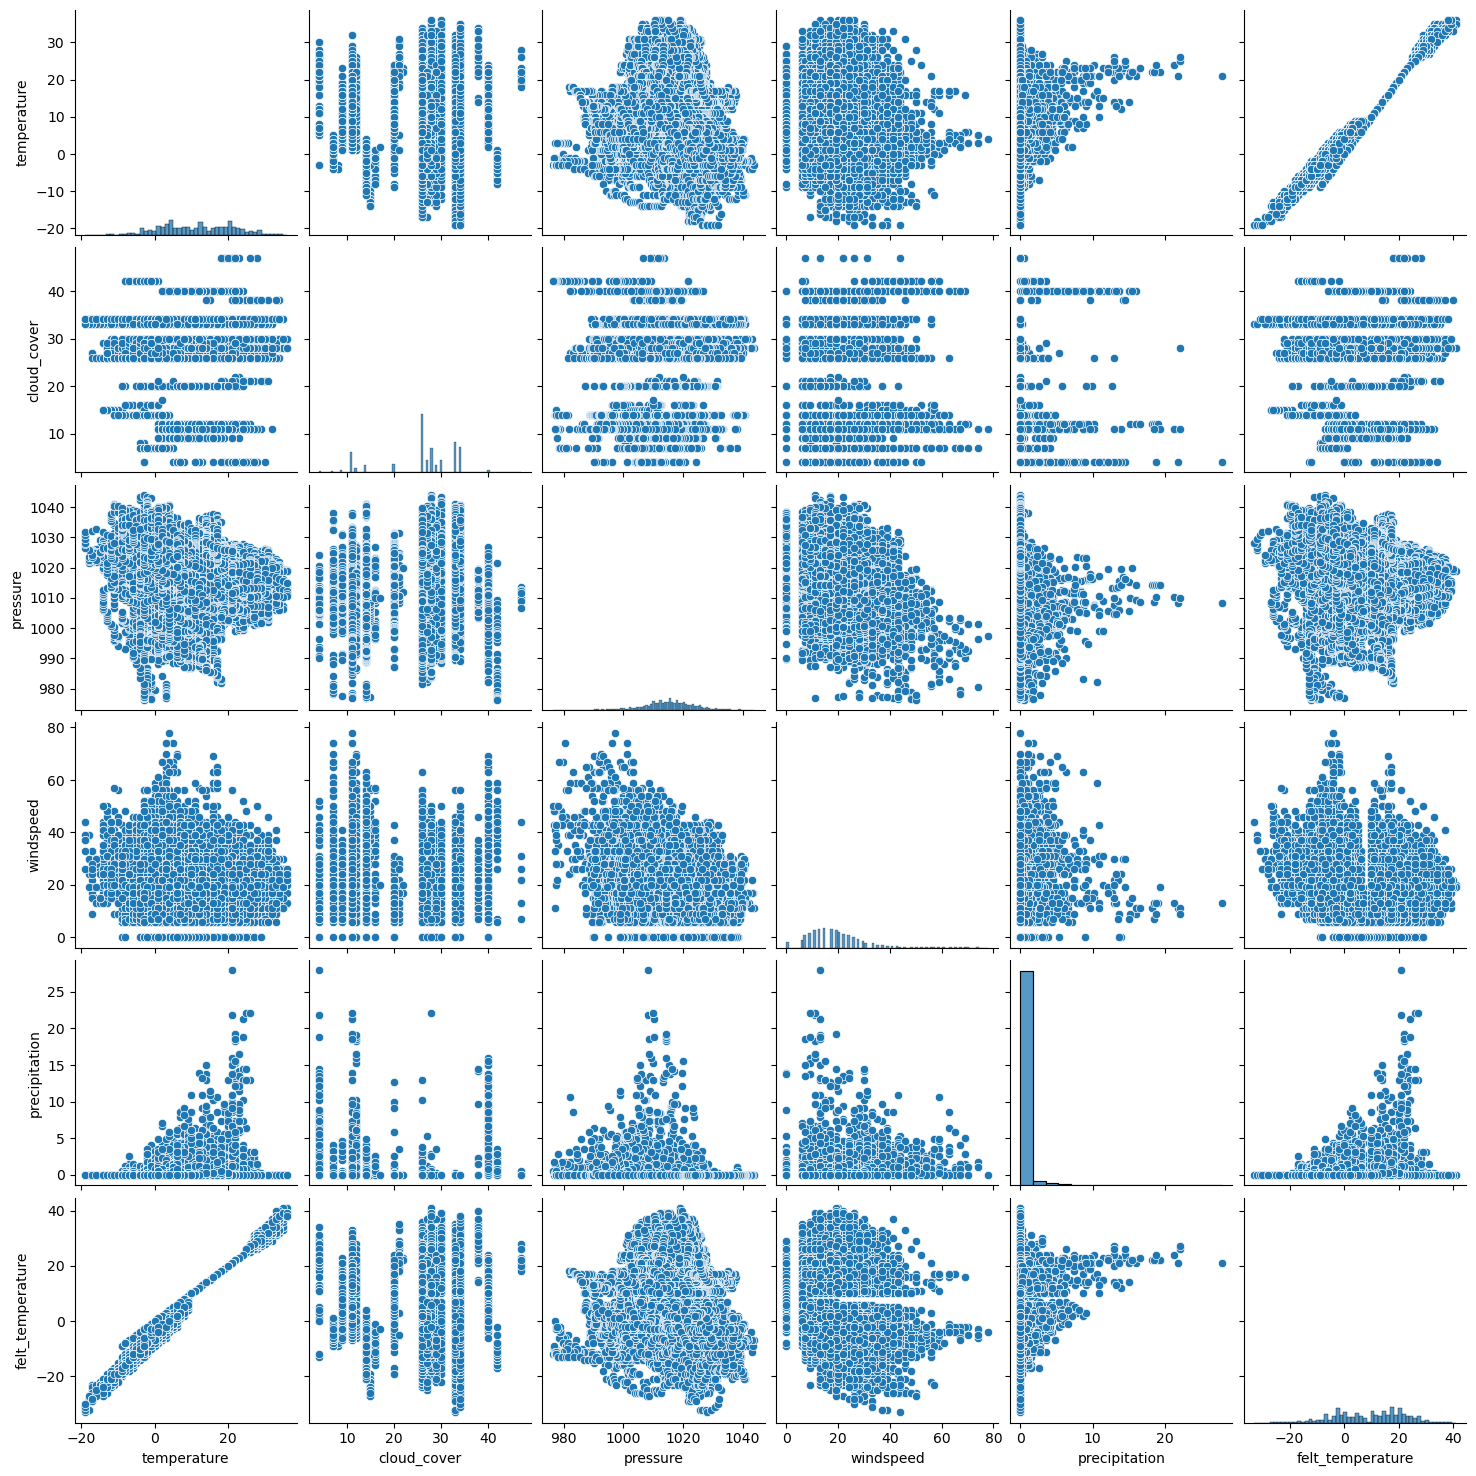

In [39]:
import seaborn as sns
sns.pairplot(weather)

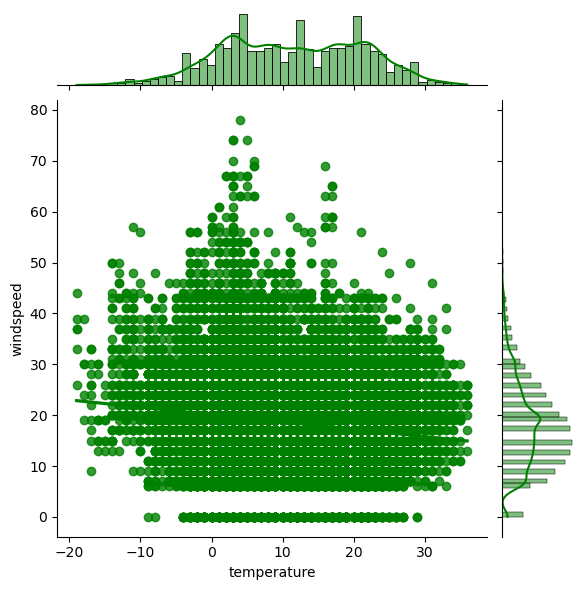

In [59]:
sns.jointplot(x=weather['temperature'], y=weather['windspeed'], kind='reg', color='green')